In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gen_sub = pd.read_csv('gender_submission.csv')
gen_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<AxesSubplot:>

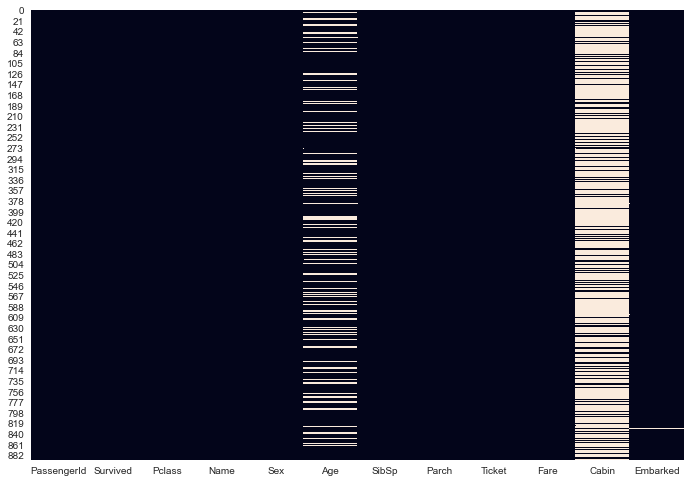

In [5]:
fig,ax = plt.subplots(figsize=(11.7,8.27))
sns.heatmap(data = train.isnull(),cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

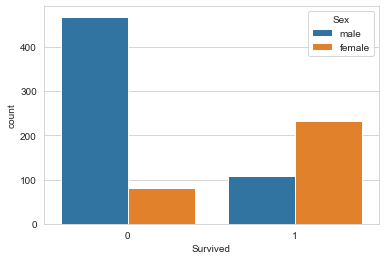

In [6]:
sns.countplot(data=train,x='Survived',hue='Sex')

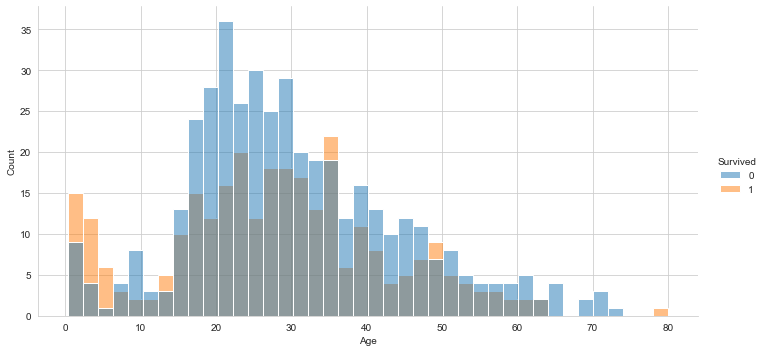

In [7]:
sns.displot(data=train,x='Age',bins=40,kde=False,hue='Survived',aspect=2,height=5)

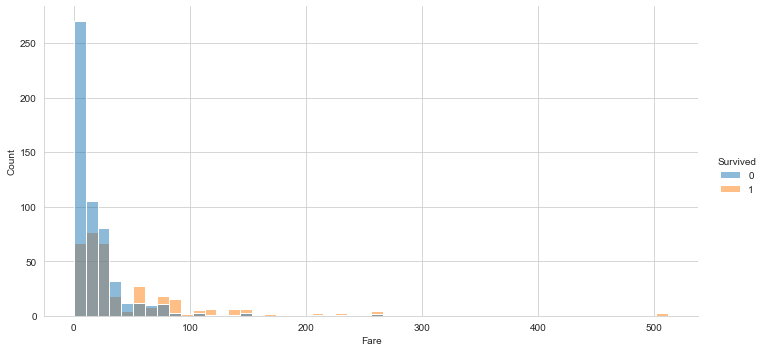

In [8]:
sns.displot(data=train,x='Fare',bins=50,kde=False,hue='Survived',aspect=2,height=5)

In [9]:
cor = train.corr()

<AxesSubplot:>

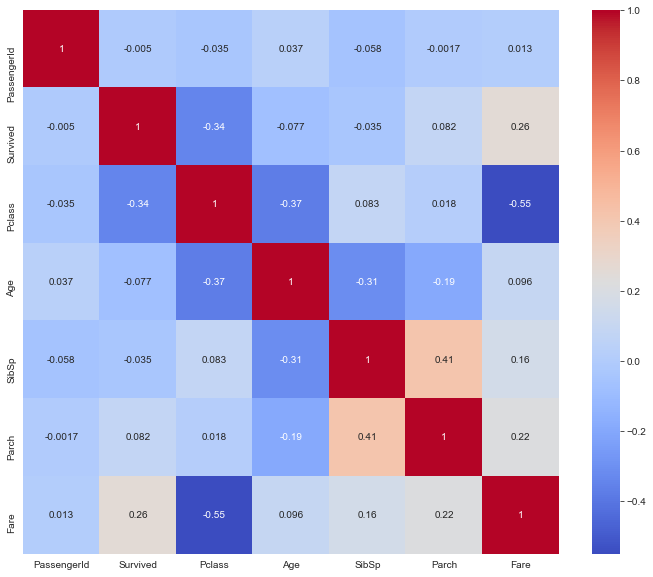

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(data=cor, annot= True, cmap='coolwarm')

In [11]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])
y = train["Survived"]
y_test = gen_sub["Survived"]

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X,y)

LogisticRegression()

In [15]:
predictions = model.predict(X_test)

In [16]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[266   0]
 [  4 148]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       1.00      0.97      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



In [17]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)